In [143]:
!pip install shap

In [144]:
# Step 1: Import libraries
import pandas as pd
import numpy as np

# Step 2: Load data
file_path = '../Datasets/input.csv'  # Adjust path if needed
data = pd.read_csv(file_path)
data

,sex,age,education,IQ,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1.0,36.62,12.0,99.0,1,17.603385,17.243334,11.729942,15.381709,18.307108,...,94.727123,73.994841,75.159075,72.479599,81.756815,74.578657,78.980627,60.508215,65.113378,69.238767
1,1.0,55.21,16.0,120.0,1,21.714048,19.579805,18.522271,26.820075,25.429025,...,83.821476,61.617403,63.964423,73.096645,74.161249,50.432291,77.440228,35.794362,70.592405,48.283439
2,1.0,26.93,16.0,116.0,1,13.371076,14.028142,16.901291,21.767857,18.227411,...,70.585726,63.864062,46.127953,65.675414,62.455949,33.114945,56.163998,37.477109,72.732968,46.665464
3,0.0,26.71,17.0,137.0,1,30.473244,13.954586,23.056715,26.177810,27.884679,...,87.768539,71.799769,65.845016,67.734909,78.328065,58.141474,68.113967,53.391012,71.111448,67.598506
4,1.0,23.45,12.0,89.0,1,18.488575,19.603144,9.899157,21.724115,32.700666,...,70.188502,27.698816,24.181746,34.445899,47.797466,20.737129,47.210870,11.104500,50.442443,36.952529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1.0,29.04,16.0,114.0,0,22.737005,23.110192,20.655895,18.224802,19.315381,...,88.188438,48.337650,77.414168,76.804444,51.999675,76.470883,80.365068,48.841509,56.730760,82.017645
100,1.0,25.65,18.0,118.0,0,20.081892,17.928614,15.977752,18.119963,17.029861,...,99.447826,99.424714,44.181841,61.683927,99.513428,43.007308,62.525177,42.766646,62.843978,39.895496
101,1.0,29.86,20.0,113.0,0,46.306229,47.379694,48.808082,50.943346,43.768029,...,90.988675,82.588144,91.869140,88.146513,82.027254,87.799612,85.360432,84.867957,90.909785,90.730560
102,0.0,27.00,18.0,130.0,0,22.152399,22.698280,19.281922,28.462510,31.292110,...,58.751205,46.407702,55.207337,50.262542,56.166800,37.817569,55.401371,31.634053,67.817508,43.937626


In [145]:
from sklearn.model_selection import train_test_split

data=data.drop(columns=['sex', 'age', 'IQ','education'], axis=1)
X = data.drop('specific.disorder', axis=1, inplace=False)
X = X.apply(pd.to_numeric, errors='coerce')
y = data['specific.disorder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [146]:
X,y

(     AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  AB.A.delta.d.F3  \
 0           17.603385         17.243334        11.729942        15.381709   
 1           21.714048         19.579805        18.522271        26.820075   
 2           13.371076         14.028142        16.901291        21.767857   
 3           30.473244         13.954586        23.056715        26.177810   
 4           18.488575         19.603144         9.899157        21.724115   
 ..                ...               ...              ...              ...   
 99          22.737005         23.110192        20.655895        18.224802   
 100         20.081892         17.928614        15.977752        18.119963   
 101         46.306229         47.379694        48.808082        50.943346   
 102         22.152399         22.698280        19.281922        28.462510   
 103         37.450821         54.405099        24.135037        22.605822   
 
      AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  AB.A.

In [149]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
# Hyperparameter tuning
param_grid = {
        'n_estimators': [100, 300, 500],
        'max_depth': [1, 3, 6, None]
}
grid_search = GridSearchCV(CatBoostClassifier(), param_grid, cv=5)
grid_search.fit(X, y)

# Best model
best_model = grid_search.best_estimator_

Learning rate set to 0.029402
0:	learn: 0.6882347	total: 15.5ms	remaining: 1.53s
1:	learn: 0.6837907	total: 18.6ms	remaining: 909ms
2:	learn: 0.6776777	total: 21.1ms	remaining: 681ms
3:	learn: 0.6715677	total: 23.8ms	remaining: 570ms
4:	learn: 0.6691997	total: 27ms	remaining: 514ms
5:	learn: 0.6655273	total: 29.4ms	remaining: 461ms
6:	learn: 0.6609740	total: 32.5ms	remaining: 431ms
7:	learn: 0.6579454	total: 34.4ms	remaining: 395ms
8:	learn: 0.6561039	total: 36.8ms	remaining: 372ms
9:	learn: 0.6516896	total: 39.5ms	remaining: 355ms
10:	learn: 0.6460062	total: 40.8ms	remaining: 330ms
11:	learn: 0.6420262	total: 42.5ms	remaining: 312ms
12:	learn: 0.6345955	total: 44ms	remaining: 294ms
13:	learn: 0.6316088	total: 45.4ms	remaining: 279ms
14:	learn: 0.6279918	total: 46.8ms	remaining: 265ms
15:	learn: 0.6246871	total: 48.6ms	remaining: 255ms
16:	learn: 0.6199735	total: 49.8ms	remaining: 243ms
17:	learn: 0.6143295	total: 51.1ms	remaining: 233ms
18:	learn: 0.6110717	total: 52.2ms	remaining: 22

In [150]:
from sklearn.metrics import accuracy_score, classification_report

best_model.fit(X_train, y_train)

# Evaluate model performance
y_pred = best_model.predict(X_test)
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Learning rate set to 0.02767
0:	learn: 0.6899883	total: 24.4ms	remaining: 2.41s
1:	learn: 0.6836031	total: 26.8ms	remaining: 1.31s
2:	learn: 0.6781376	total: 29.7ms	remaining: 961ms
3:	learn: 0.6762115	total: 32.3ms	remaining: 774ms
4:	learn: 0.6708505	total: 33.5ms	remaining: 637ms
5:	learn: 0.6643442	total: 36.5ms	remaining: 571ms
6:	learn: 0.6575344	total: 39.2ms	remaining: 520ms
7:	learn: 0.6551996	total: 41.1ms	remaining: 473ms
8:	learn: 0.6529774	total: 43ms	remaining: 435ms
9:	learn: 0.6496383	total: 44.6ms	remaining: 402ms
10:	learn: 0.6441894	total: 47.1ms	remaining: 381ms
11:	learn: 0.6404686	total: 48.6ms	remaining: 356ms
12:	learn: 0.6377925	total: 49.8ms	remaining: 333ms
13:	learn: 0.6346461	total: 51ms	remaining: 313ms
14:	learn: 0.6312349	total: 52.4ms	remaining: 297ms
15:	learn: 0.6300534	total: 54.4ms	remaining: 286ms
16:	learn: 0.6272430	total: 56.1ms	remaining: 274ms
17:	learn: 0.6260604	total: 57.5ms	remaining: 262ms
18:	learn: 0.6211539	total: 59.3ms	remaining: 253

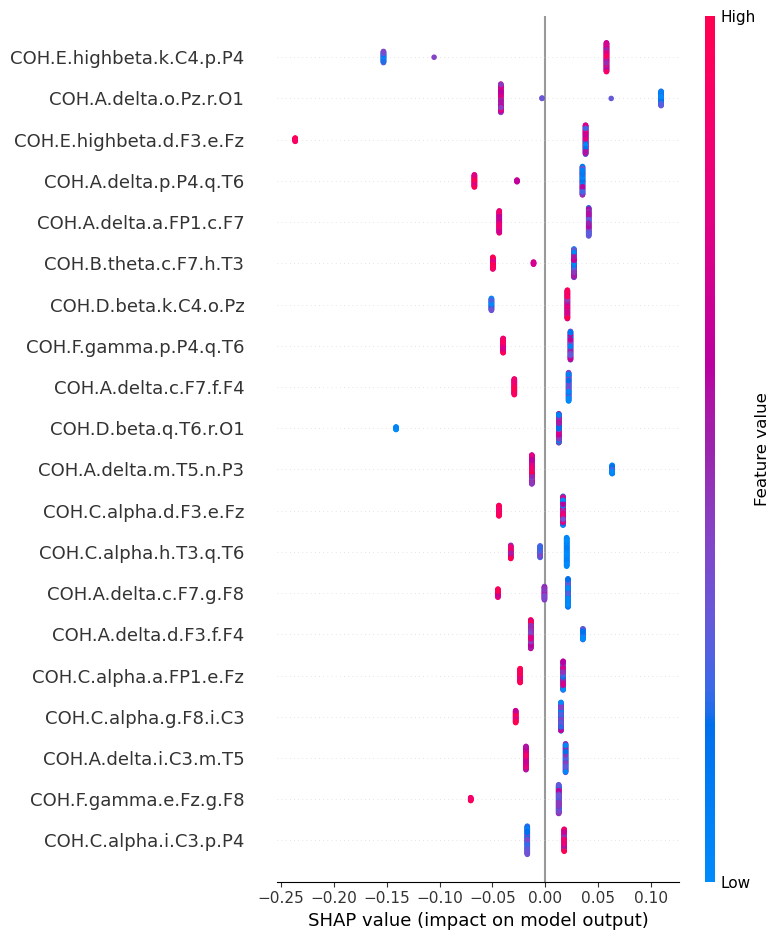

KeyError: 0

In [155]:
import shap
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X)
# Example: Use a small subset of data for explanation
X_sample = X[:100]  # Sampling the dataset

# Visualize SHAP values
shap.summary_plot(shap_values, X_sample)
shap.dependence_plot(shap_values[0], X_sample[0])  # For the first feature

In [156]:
print(type(shap_values))
print(len(shap_values))
print(shap_values.shape)

<class 'numpy.ndarray'>
100
(100, 1140)


In [157]:
shap.force_plot(explainer.expected_value, shap_values[0], X.iloc[0])

In [133]:
import shap  # SHAP library
import matplotlib.pyplot as plt

In [134]:
# Step 5: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Step 7: Initialize SHAP Explainer
# TreeExplainer works efficiently for tree-based models like Random Forest
explainer = shap.TreeExplainer(model)

# Compute SHAP values for test data
shap_values = explainer.shap_values(X_test)

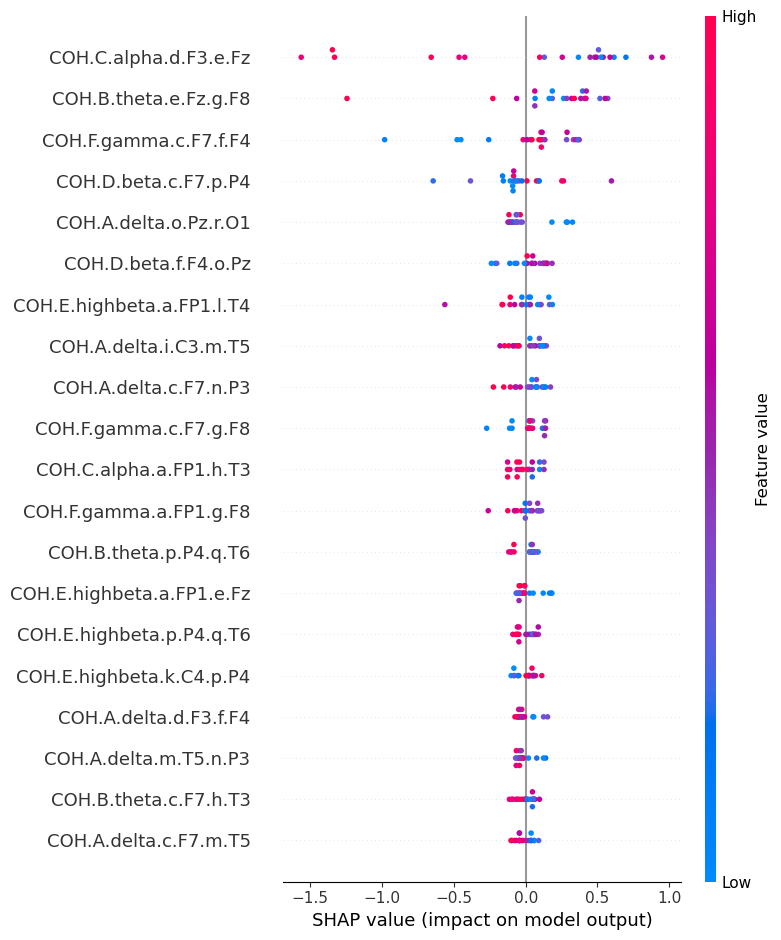

In [ ]:

# Visualize important EEG features
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# Force plot for a specific EEG recording
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])